In [1]:
%matplotlib qt

In [2]:
import matplotlib as mpl
import sys
sys.path.append("/Users/yao/Smilei")
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_55415/621321092.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [3]:
## prepare simulation data

wkdir = [
    #  '/Users/yao/Documents/Data/IFE/test0/laser_propagation_3d', # with only test particles
    #  '/Users/yao/Documents/Data/IFE/test0/laser_propagation_3d_target/', # with a thin foil target
    #  '/Users/yao/Desktop/test1/',
    #  '/Users/yao/Desktop/test2/',
     '/Users/yao/Desktop/data/ife_yao2_cp2/',
    ]

S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/(1.0*1e-6))
# S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.0*np.pi*3e8/(1.0*1e-6))


Loaded simulation '/Users/yao/Desktop/data/ife_yao2_cp2/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


In [4]:
Lx = S0.namelist.grid_length[0].real / 2 / np.pi      # in um
print("Lx = ", Lx)
Ly = S0.namelist.grid_length[1].real / 2 / np.pi      # in um
print("Ly = ", Ly)
Lz = S0.namelist.grid_length[1].real / 2 / np.pi      # in um
print("Lz = ", Lz)

AttributeError: 'Namelist' object has no attribute 'grid_length'

In [6]:
## here, I check probe 0 and 1

Ex_probe = S0.Probe(0, "Ex",
         units=['um','fs','V/m'],
        #  subset={'r':0.}
        # modes=1,
        # theta=0,  
         ).getData()[:]

In [7]:
Ex_probe = np.array(Ex_probe)
Ex_probe.shape

(68, 125, 123, 100)

In [8]:
plt.imshow(Ex_probe[20, :,:,40].T,
           origin='lower',
           extent=[0, Lx, 0, Ly],
           vmin=-5e11, vmax=5e11,
           cmap='bwr')
plt.colorbar(label='Ex (V/m)')
plt.xlabel('x (um)')
plt.ylabel('y (um)')

Text(0, 0.5, 'y (um)')

In [112]:
## here, I check probe 2

Ex_probe = S1.Probe(2, "Ey",
         units=['um','fs','V/m'],
        #  subset={'r':0.}
        # modes=1,
        # theta=0,  
         ).getData()[:]

In [113]:
Ex_probe = np.array(Ex_probe)
Ex_probe.shape

(397, 5, 123, 100)

Text(0, 0.5, 'z (um)')

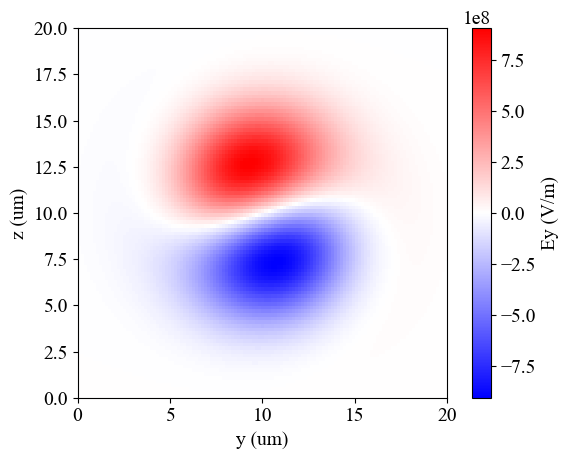

In [122]:
plt.imshow(Ex_probe[100, 4,:,:].T,
           origin='lower',
           extent=[0, Ly, 0, Lz],
        #    vmin=-3e12, vmax=3e12,
           cmap='bwr')
plt.colorbar(label='Ey (V/m)')
plt.xlabel('y (um)')
plt.ylabel('z (um)')

In [9]:
Bxm = S0.Field(0, "Bx_m",subset={'z':Lz/2.},
         units=['um','fs','T'],
         vsym=True,
         cmap='smileiD',
         aspect='equal',
         )
# Bxm.set(layout='tight')
Bxm.slide()

Field diagnostic #0: Bx_m
	Time_average: 28 timesteps
	Grid offset: 0.0, 0.0, 157.07963267948966
	Grid spacing: 0.7853981633974483, 1.1780972450961724, 0.39269908169872414
	subset at z = [157.07963268] L_r


In [11]:
S0.Probe(0, 'Bx',
         subset={'axis3':Lz/2.},
        # subset={'axis3':50},
         units=['um','fs','T','V/m'],
         vsym=True,
         cmap='smileiD',
         aspect='equal',
         ).slide()

#try to check with getData()

Probe #0: 3-dimensional, with fields Ex,Ey,Ez,Bx,By,Bz
	p0 = 0.0 0.0 0.0
	p1 = 376.99111843077515 0.0 0.0
	p2 = 0.0 314.1592653589793 0.0
	p3 = 0.0 0.0 314.1592653589793
	number = 125 123 100
	subset at axis3 = [25.3866073] L_r


In [12]:
B_probe = S0.Probe(0, "Bx",
         units=['um','fs','V/m','T'],
        #  subset={'r':0.}
        # modes=1,
        # theta=0,  
         ).getData()[:]

In [13]:
B_probe = np.array(B_probe)
B_probe.shape

(68, 125, 123, 100)

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(B_probe[67, :,:,50].T,
               origin='lower',
               extent=[0, Lx, 0, Ly],
               vmin=-4000, vmax=4000,
               cmap='bwr')

# Make a colorbar axis that exactly matches the height of `ax`
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)  # width & gap
cb = fig.colorbar(im, cax=cax)

ax.set_xlabel('x (um)')
ax.set_ylabel('y (um)')

plt.tight_layout()

In [29]:
S0.Probe('long', 'Bx',
        #  subset={'axis3':Lz/2.},
        # subset={'axis3':49},
         units=['um','fs','T','V/m'],
         vsym=True,
         cmap='smileiD',
         aspect='equal',
         ).slide()

Probe #2: 2-dimensional, with fields Bx,Jy,Jz,Jx
	p0 = 0.0 0.0 157.07963267948966
	p1 = 376.99111843077515 0.0 157.07963267948966
	p2 = 0.0 314.1592653589793 157.07963267948966
	number = 500 323


In [33]:
S0.Probe('trans', 'Bx',
         subset={'axis1':Lz/2.*5.},
        # subset={'axis1':4},
         units=['um','fs','T','V/m'],
         vsym=True,
         cmap='smileiD',
         aspect='equal',
         ).slide()

Probe #1: 3-dimensional, with fields Bx,Jy,Jz,Jx
	p0 = 37.69911184307752 0.0 0.0
	p1 = 339.29200658769764 0.0 0.0
	p2 = 37.69911184307752 314.1592653589793 0.0
	p3 = 37.69911184307752 0.0 314.1592653589793
	number = 5 323 300
	subset at axis1 = [150.79644737] L_r


In [34]:
S0.ParticleBinning(0,units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=19,
                   vmax=23,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()    


#0 - Number density of species # 0
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [36]:
S0.ParticleBinning(1,units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=17,
                   vmax=23,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()    


#1 - Number density of species # 0
    Averaging over 28 timesteps
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [40]:
S0.ParticleBinning(2,units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=17,
                   vmax=23,
                #    subset={'z':S0.namelist.Ltrans/2.},
                   subset={'x':S0.namelist.Llong*3./5.},
                   ).slide()   


#2 - Number density of species # 0
    x from 0 to 376.991 in 5 steps 
    y from 0 to 314.159 in 323 steps 
    z from 0 to 314.159 in 300 steps 

subset at x = [263.8937] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [43]:
S0.ParticleBinning("vr_W",units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                #    data_log=True,
                   cmap='smileiD',
                   vmin=-0.1,
                   vmax=0.1,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()    


#3 - user_function of species # 0
    Averaging over 28 timesteps
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [44]:
S0.ParticleBinning("vr_W_trans",units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                #    data_log=True,
                   cmap='smileiD',
                   vmin=-0.01,
                   vmax=0.01,
                #    subset={'z':S0.namelist.Ltrans/2.},
                   subset={'x':S0.namelist.Llong*1./5.},
                   ).slide()    


#4 - user_function of species # 0
    x from 0 to 376.991 in 5 steps 
    y from 0 to 314.159 in 323 steps 
    z from 0 to 314.159 in 300 steps 

subset at x = [113.0973] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [45]:
S0.ParticleBinning("Lx_W",units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                #    data_log=True,
                   cmap='smileiD',
                   vmin=-5,
                   vmax=5,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()   


#5 - user_function of species # 0
    Averaging over 28 timesteps
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [48]:
S0.ParticleBinning("Lx_W_trans",units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                #    data_log=True,
                   cmap='smileiD',
                  #  vmin=-5,
                  #  vmax=5,
                #    subset={'z':S0.namelist.Ltrans/2.},
                   subset={'x':S0.namelist.Llong*3./5.},
                   ).slide()    


#6 - user_function of species # 0
    x from 0 to 376.991 in 5 steps 
    y from 0 to 314.159 in 323 steps 
    z from 0 to 314.159 in 300 steps 

subset at x = [263.8937] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [50]:
S0.ParticleBinning("Lx_trans",units=['um','fs','T','V/m','cm^-3'],
                   aspect='equal',
                #    data_log=True,
                   cmap='smileiD',
                   vmin=-10,
                   vmax=10,
                #    subset={'z':S0.namelist.Ltrans/2.},
                   subset={'x':S0.namelist.Llong*3./5.},
                   ).slide()   


#7 - user_function of species # 0
    x from 0 to 376.991 in 5 steps 
    y from 0 to 314.159 in 323 steps 
    z from 0 to 314.159 in 300 steps 

subset at x = [263.8937] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [54]:
S0.ParticleBinning("ekin_W",units=['um','fs','T','V/m','cm^-3','keV cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=21,
                   vmax=24,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()  


#8 - Energy density of species # 0
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [55]:
S0.ParticleBinning("ekin_W_trans",units=['um','fs','T','V/m','cm^-3','keV cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=22,
                   vmax=25,
                #    subset={'z':S0.namelist.Ltrans/2.},
                 subset={'x':S0.namelist.Llong*1./5.},
                   ).slide()  


#9 - Energy density of species # 0
    x from 0 to 376.991 in 5 steps 
    y from 0 to 314.159 in 323 steps 
    z from 0 to 314.159 in 300 steps 

subset at x = [113.0973] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [58]:
S0.ParticleBinning("weight_H",units=['um','fs','T','V/m','cm^-3','keV cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=16,
                   vmax=22,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()  


#10 - Number density of species # 1
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

Operation : #10
subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [59]:
S0.ParticleBinning("weight_C",units=['um','fs','T','V/m','cm^-3','keV cm^-3'],
                   aspect='equal',
                   data_log=True,
                   cmap=newcmap,
                   vmin=16,
                   vmax=22,
                   subset={'z':S0.namelist.Ltrans/2.},
                #    subset={'x':S0.namelist.Ltrans/2.},
                   ).slide()  


#11 - Number density of species # 2
    x from 0 to 376.991 in 500 steps 
    y from 0 to 314.159 in 323 steps 
    z from 156.294 to 157.865 in 3 steps 

Operation : #11
subset at z = [157.0795] L_r
The value in each bin is the sum of the `deposited_quantity` divided by the bin size



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


In [23]:
Lx = 60

x = np.linspace(0, Lx, 1000)

plasma_ramp = 1.
ne = 1.0e22

def fne_plasma(x):
    # return ne*np.exp( -(x-Lx/2)**12/(Lx/2-plasma_ramp)**12 )
    return ne*np.exp( -(x-Lx/2)**12/(1.5-plasma_ramp)**12 )

plt.plot(x, fne_plasma(x))